In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor,BaggingClassifier,BaggingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
import pickle
import os


In [2]:
!pip install statsmodels


  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB 281.8 kB/s eta 0:00:35
   ---------------------------------------- 0.1/9.9 MB 476.3 kB/s eta 0:00:21
    --------------------------------------- 0.1/9.9 MB 525.1 kB/s eta 0:00:19
    --------------------------------------- 0.2/9.9 MB 731.4 kB/s eta 0:00:14
    --------------------------------------- 0.2/9.9 MB 758.5 kB/s eta 0:00:13
   - -------------------------------------- 0.3/9.9 MB 827.2 kB/s eta 0:00:12
   - -------------------------------------- 0.4/9.9 MB 857.5 kB/s eta 0:00:12
   - -------------------------------------- 0.4/9.9 MB 867.0 kB/s eta 0:00:11
   - -------------------------------------- 0.5/9.9 MB 880.6 kB/s eta 0:00:11
   -- -------------------


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
df = pd.read_csv(r'C:\Users\Rohan\Pictures\rohan\SeoulBikeData\SeoulBikeData.csv', encoding="latin-1")


In [3]:
df.sample(4)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8363,14-11-2018,892,11,12.1,49,0.8,1827,1.6,1.61,0.0,0.0,Autumn,No Holiday,Yes
8258,10-11-2018,568,2,10.7,80,0.6,409,7.3,0.00,0.0,0.0,Autumn,No Holiday,Yes
6216,17-08-2018,1109,0,24.1,45,2.0,2000,11.4,0.00,0.0,0.0,Summer,No Holiday,Yes
3026,06-04-2018,27,2,7.3,96,1.0,337,6.6,0.00,1.5,0.0,Spring,No Holiday,Yes


In [6]:
df.shape

(8760, 14)

In [4]:
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")


df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Day_of_Week'] = df['Date'].dt.day_name()
df['Hour'] = df['Hour'].astype(int)


.

# Outlayers detection start

In [8]:
df.select_dtypes(include='number').corr()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month,Year
Rented Bike Count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,2.229091e-02,1.335139e-01,2.151618e-01
Hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,1.450952e-16,1.749134e-15,2.336763e-14
Temperature(°C),0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,1.564544e-02,2.161826e-01,3.777958e-01
Humidity(%),-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,-2.904392e-02,1.398748e-01,3.592468e-02
Wind speed (m/s),0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-3.197744e-02,-1.567102e-01,-3.780878e-03
Visibility (10m),0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,-1.017585e-01,6.487420e-02,5.238110e-02
Dew point temperature(°C),0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,1.525311e-04,2.425519e-01,3.363497e-01
Solar Radiation (MJ/m2),0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,-2.981839e-03,-3.159544e-02,1.280860e-01
Rainfall(mm),-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,-1.623338e-03,1.195810e-02,2.752192e-02
Snowfall (cm),-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,1.020774e-01,5.312091e-02,-2.064178e-01


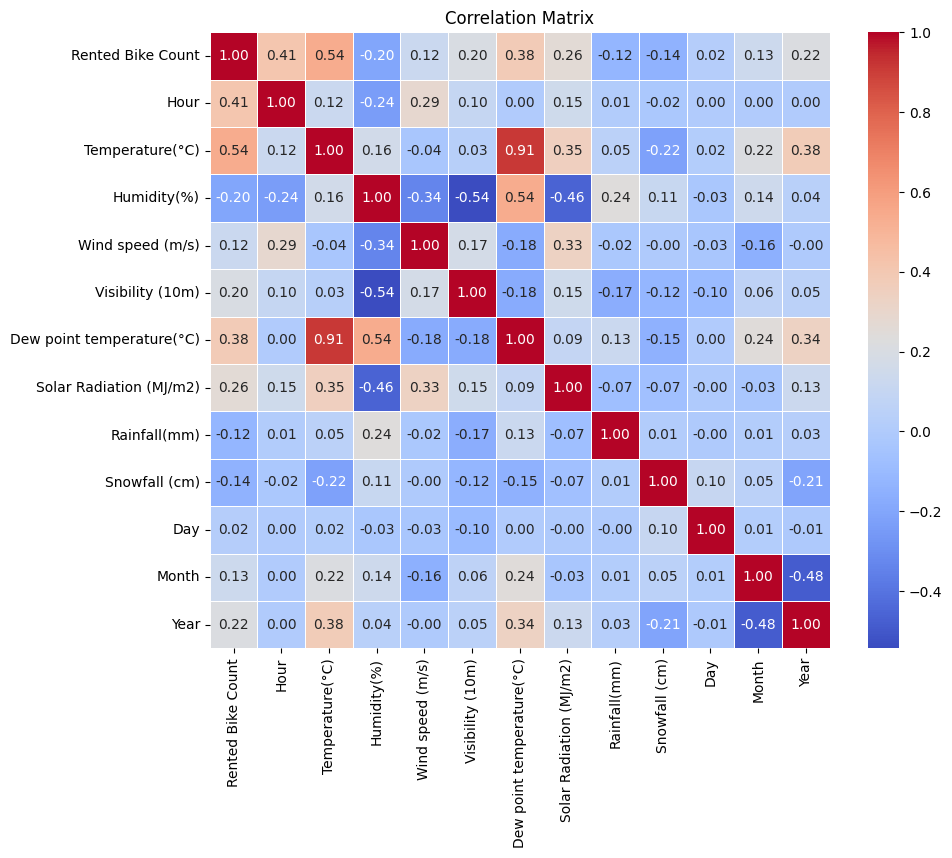

In [9]:
import seaborn as sns

numeric_columns = df.select_dtypes(include='number')

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [10]:
correlation_matrix.T

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month,Year
Rented Bike Count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,2.229091e-02,1.335139e-01,2.151618e-01
Hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,1.450952e-16,1.749134e-15,2.336763e-14
Temperature(°C),0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,1.564544e-02,2.161826e-01,3.777958e-01
Humidity(%),-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,-2.904392e-02,1.398748e-01,3.592468e-02
Wind speed (m/s),0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-3.197744e-02,-1.567102e-01,-3.780878e-03
Visibility (10m),0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,-1.017585e-01,6.487420e-02,5.238110e-02
Dew point temperature(°C),0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,1.525311e-04,2.425519e-01,3.363497e-01
Solar Radiation (MJ/m2),0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,-2.981839e-03,-3.159544e-02,1.280860e-01
Rainfall(mm),-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,-1.623338e-03,1.195810e-02,2.752192e-02
Snowfall (cm),-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,1.020774e-01,5.312091e-02,-2.064178e-01


In [11]:
df.sample(4)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Day_of_Week
1099,2018-01-15,444,19,4.4,53,1.2,538,-4.3,0.00,0.0,0.0,Winter,No Holiday,Yes,15,1,2018,Monday
5983,2018-08-07,1059,7,27.0,69,0.8,2000,20.8,0.23,0.0,0.0,Summer,No Holiday,Yes,7,8,2018,Tuesday
7103,2018-09-22,1108,23,17.9,66,1.0,2000,11.4,0.00,0.0,0.0,Autumn,No Holiday,Yes,22,9,2018,Saturday
7488,2018-10-09,0,0,12.6,54,0.2,2000,3.5,0.00,0.0,0.0,Autumn,Holiday,No,9,10,2018,Tuesday


In [5]:
df.drop('Date',axis=1,inplace=True)

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

numeric_columns = df.select_dtypes(include='number')

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = numeric_columns.columns
vif_data["VIF"] = [variance_inflation_factor
                   (numeric_columns.values, i) for i in range(numeric_columns.shape[1])]

# Display the results
print(vif_data)


                     Variable         VIF
0           Rented Bike Count    4.155493
1                        Hour    5.065656
2             Temperature(°C)  189.618643
3                 Humidity(%)  188.927890
4            Wind speed (m/s)    4.892116
5            Visibility (10m)   10.791542
6   Dew point temperature(°C)  126.979730
7     Solar Radiation (MJ/m2)    2.935119
8                Rainfall(mm)    1.123631
9               Snowfall (cm)    1.155580
10                        Day    4.380161
11                      Month    5.123473
12                       Year  408.215388


In [14]:
numeric_columns = df.select_dtypes(include=['number']).columns

columns_to_drop = ['Dew point temperature(°C)', 'Humidity(%)']
X = df[numeric_columns].drop(columns=columns_to_drop, axis=1)

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the results
print(vif_data)


                   Variable        VIF
0         Rented Bike Count   3.988661
1                      Hour   4.934831
2           Temperature(°C)   3.837495
3          Wind speed (m/s)   4.875236
4          Visibility (10m)   7.467432
5   Solar Radiation (MJ/m2)   1.933544
6              Rainfall(mm)   1.089705
7             Snowfall (cm)   1.123290
8                       Day   4.289961
9                     Month   5.064407
10                     Year  18.289899


In [6]:
columns_to_drop = ['Dew point temperature(°C)', 'Humidity(%)']
df.drop(columns=columns_to_drop,axis =1,inplace=True)

In [16]:
df.sample(4)

,Rented Bike Count,Hour,Temperature(°C),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Day_of_Week
1599,169,15,-5.7,4.4,1995,1.94,0.0,0.0,Winter,No Holiday,Yes,5,2,2018,Monday
5851,1553,19,36.1,3.7,1837,0.47,0.0,0.0,Summer,No Holiday,Yes,1,8,2018,Wednesday
1443,54,3,-10.7,1.4,2000,0.00,0.0,0.0,Winter,No Holiday,Yes,30,1,2018,Tuesday
4486,2237,22,22.4,2.5,1778,0.00,0.0,0.0,Summer,No Holiday,Yes,5,6,2018,Tuesday


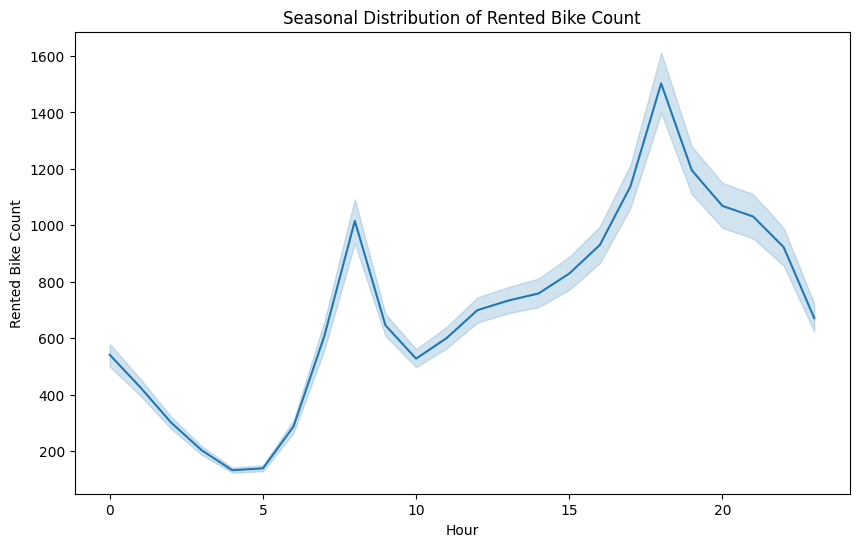

In [24]:
# Explore relationships between categorical features
plt.figure(figsize=(10, 6))
sns.lineplot(x="Hour", y="Rented Bike Count", data=df)
plt.title("Seasonal Distribution of Rented Bike Count")
plt.show()

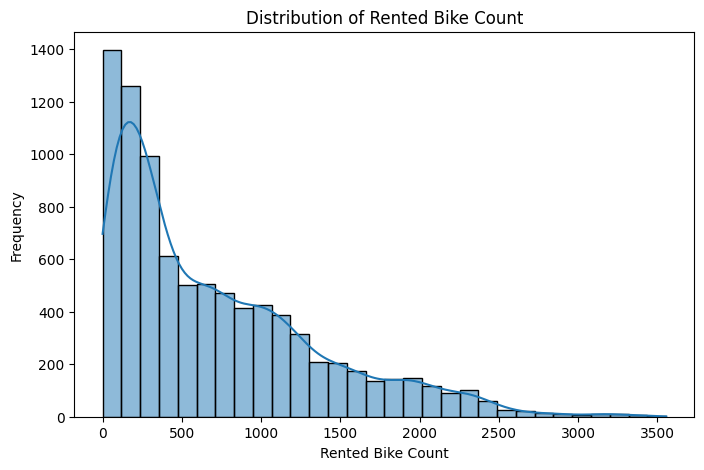

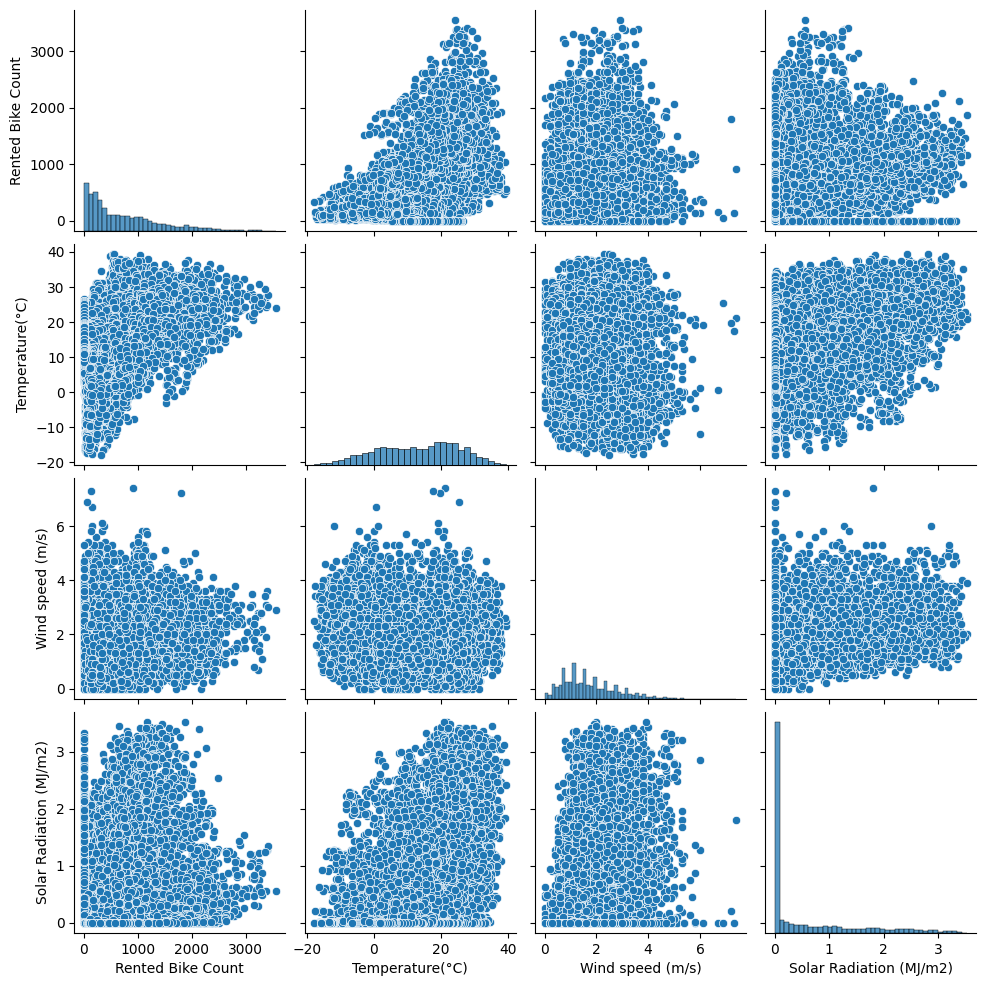

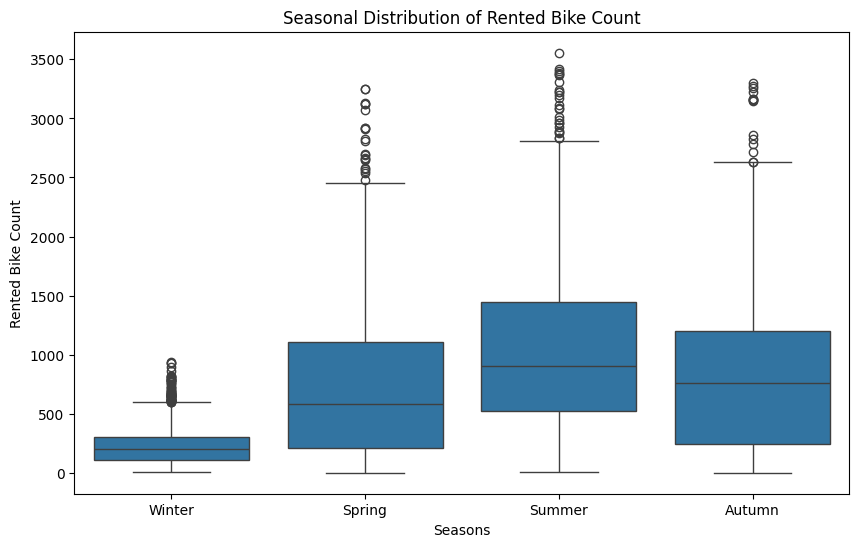

Missing Values:
 Rented Bike Count          0
Hour                       0
Temperature(°C)            0
Wind speed (m/s)           0
Visibility (10m)           0
Solar Radiation (MJ/m2)    0
Rainfall(mm)               0
Snowfall (cm)              0
Seasons                    0
Holiday                    0
Functioning Day            0
Day                        0
Month                      0
Year                       0
Day_of_Week                0
dtype: int64


In [18]:
# Visualize the distribution of the target variable ("Rented Bike Count")
plt.figure(figsize=(8, 5))
sns.histplot(df["Rented Bike Count"], bins=30, kde=True)
plt.title("Distribution of Rented Bike Count")
plt.xlabel("Rented Bike Count")
plt.ylabel("Frequency")
plt.show()

# Explore relationships between numerical features
sns.pairplot(df[["Rented Bike Count", "Temperature(°C)", "Wind speed (m/s)", "Solar Radiation (MJ/m2)"]])
plt.show()

# Explore relationships between categorical features
plt.figure(figsize=(10, 6))
sns.boxplot(x="Seasons", y="Rented Bike Count", data=df)
plt.title("Seasonal Distribution of Rented Bike Count")
plt.show()

# Check missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Lable Encoding 

show me which word to leble (leble encoding) plz
[    in chat gpt    ]

In [ ]:
df['Day_of_Week'].value_counts()

Day_of_Week
Friday       1272
Saturday     1248
Sunday       1248
Monday       1248
Tuesday      1248
Wednesday    1248
Thursday     1248
Name: count, dtype: int64

In [ ]:
df['Seasons'].value_counts()

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64

In [ ]:
df['Functioning Day'].value_counts()

Functioning Day
Yes    8465
No      295
Name: count, dtype: int64

In [ ]:
df['Holiday'].value_counts()

Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64

In [7]:

# Assuming df is your DataFrame
le = LabelEncoder()

df['Day_of_Week'] = le.fit_transform(df['Day_of_Week'])
df['Holiday'] = le.fit_transform(df['Holiday'])
df['Seasons'] = le.fit_transform(df['Seasons'])
df['Functioning Day'] = le.fit_transform(df['Functioning Day'])

In [26]:
df.head(10)

,Rented Bike Count,Hour,Temperature(°C),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Day_of_Week
0,254,0,-5.2,2.2,2000,0.00,0.0,0.0,3,1,1,1,12,2017,0
1,204,1,-5.5,0.8,2000,0.00,0.0,0.0,3,1,1,1,12,2017,0
2,173,2,-6.0,1.0,2000,0.00,0.0,0.0,3,1,1,1,12,2017,0
3,107,3,-6.2,0.9,2000,0.00,0.0,0.0,3,1,1,1,12,2017,0
4,78,4,-6.0,2.3,2000,0.00,0.0,0.0,3,1,1,1,12,2017,0
5,100,5,-6.4,1.5,2000,0.00,0.0,0.0,3,1,1,1,12,2017,0
6,181,6,-6.6,1.3,2000,0.00,0.0,0.0,3,1,1,1,12,2017,0
7,460,7,-7.4,0.9,2000,0.00,0.0,0.0,3,1,1,1,12,2017,0
8,930,8,-7.6,1.1,2000,0.01,0.0,0.0,3,1,1,1,12,2017,0
9,490,9,-6.5,0.5,1928,0.23,0.0,0.0,3,1,1,1,12,2017,0


In [ ]:
df.head(10)

,Rented Bike Count,Hour,Temperature(°C),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Day_of_Week
0,254,0,-5.2,2.2,2000,0.00,0.0,0.0,3,1,1,1,12,2017,0
1,204,1,-5.5,0.8,2000,0.00,0.0,0.0,3,1,1,1,12,2017,0
2,173,2,-6.0,1.0,2000,0.00,0.0,0.0,3,1,1,1,12,2017,0
3,107,3,-6.2,0.9,2000,0.00,0.0,0.0,3,1,1,1,12,2017,0
4,78,4,-6.0,2.3,2000,0.00,0.0,0.0,3,1,1,1,12,2017,0
5,100,5,-6.4,1.5,2000,0.00,0.0,0.0,3,1,1,1,12,2017,0
6,181,6,-6.6,1.3,2000,0.00,0.0,0.0,3,1,1,1,12,2017,0
7,460,7,-7.4,0.9,2000,0.00,0.0,0.0,3,1,1,1,12,2017,0
8,930,8,-7.6,1.1,2000,0.01,0.0,0.0,3,1,1,1,12,2017,0
9,490,9,-6.5,0.5,1928,0.23,0.0,0.0,3,1,1,1,12,2017,0


In [ ]:

# Sample data with words as labels
words = ['No', 'Yes']

# Create a LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder to the words and transform them
encoded_words = label_encoder.fit_transform(words)

# Display the original words and their corresponding encodings
for original_word, encoded_word in zip(words, encoded_words):
    print(f"Word: {original_word}, Encoding: {encoded_word}")

Word: No, Encoding: 0
Word: Yes, Encoding: 1


In [ ]:

# Sample data with seasons as labels
seasons = ['Spring', 'Summer', 'Autumn', 'Winter']

# Create a LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder to the seasons and transform them
encoded_seasons = label_encoder.fit_transform(seasons)

# Display the original seasons and their corresponding encodings
for original_season, encoded_season in zip(seasons, encoded_seasons):
    print(f"Season: {original_season}, Encoding: {encoded_season}")


Season: Spring, Encoding: 1
Season: Summer, Encoding: 2
Season: Autumn, Encoding: 0
Season: Winter, Encoding: 3


In [ ]:

# Sample data with labels 'Holiday' and 'No Holiday'
holiday_status = [ 'No Holiday', 'Holiday']

# Create a LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder to the holiday status and transform them
encoded_holidays = label_encoder.fit_transform(holiday_status)

# Display the original holiday status and their corresponding encodings
for original_status, encoded_status in zip(holiday_status, encoded_holidays):
    print(f"Holiday Status: {original_status}, Encoding: {encoded_status}")


Holiday Status: No Holiday, Encoding: 1
Holiday Status: Holiday, Encoding: 0


In [ ]:

# Sample data with 'Day_of_Week' labels
days_of_week = ['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday']

# Create a LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder to the days of the week and transform them
encoded_days = label_encoder.fit_transform(days_of_week)

# Display the original days of the week and their corresponding encodings
for original_day, encoded_day in zip(days_of_week, encoded_days):
    print(f"Day of Week: {original_day}, Encoding: {encoded_day}")


Day of Week: Friday, Encoding: 0
Day of Week: Saturday, Encoding: 2
Day of Week: Sunday, Encoding: 3
Day of Week: Monday, Encoding: 1
Day of Week: Tuesday, Encoding: 5
Day of Week: Wednesday, Encoding: 6
Day of Week: Thursday, Encoding: 4


# scaling 

In [8]:


# Assuming df is your DataFrame
numeric_columns = ['Hour', 'Temperature(°C)', 'Wind speed (m/s)',
                    'Visibility (10m)', 'Solar Radiation (MJ/m2)',
                    'Rainfall(mm)', 'Snowfall (cm)', 'Month', 'Year']

# Create a DataFrame with only the specified numeric columns
X_numeric = df[numeric_columns]

# Apply Min-Max Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Replace the original numeric columns with the scaled ones in the DataFrame
df[numeric_columns] = X_scaled



In [28]:
df[numeric_columns] 

,Hour,Temperature(°C),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Year
0,0.000000,0.220280,0.297297,1.000000,0.0,0.0,0.0,1.000000,0.0
1,0.043478,0.215035,0.108108,1.000000,0.0,0.0,0.0,1.000000,0.0
2,0.086957,0.206294,0.135135,1.000000,0.0,0.0,0.0,1.000000,0.0
3,0.130435,0.202797,0.121622,1.000000,0.0,0.0,0.0,1.000000,0.0
4,0.173913,0.206294,0.310811,1.000000,0.0,0.0,0.0,1.000000,0.0
...,...,...,...,...,...,...,...,...,...
8755,0.826087,0.384615,0.351351,0.946275,0.0,0.0,0.0,0.909091,1.0
8756,0.869565,0.370629,0.310811,1.000000,0.0,0.0,0.0,0.909091,1.0
8757,0.913043,0.356643,0.040541,0.983781,0.0,0.0,0.0,0.909091,1.0
8758,0.956522,0.347902,0.135135,0.928535,0.0,0.0,0.0,0.909091,1.0


In [ ]:
df.sample(3)

,Rented Bike Count,Hour,Temperature(°C),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Day_of_Week
4896,1322,0.000000,0.708042,0.202703,1.000000,0.000000,0.0,0.0,2,1,1,23,0.454545,1.0,2
8465,1039,0.739130,0.463287,0.229730,0.785099,0.051136,0.0,0.0,0,1,1,18,0.909091,1.0,3
3651,170,0.130435,0.634615,0.108108,0.159655,0.000000,0.0,0.0,1,1,1,2,0.363636,1.0,6


# model train

In [9]:



# Assuming your DataFrame is named 'df'
# Selecting features and target variable
X =df.drop('Rented Bike Count',axis=1)
y = df['Rented Bike Count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_pred = linear_reg.predict(X_test)

# Decision Tree
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)
decision_tree_pred = decision_tree.predict(X_test)

# Random Forest
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)
random_forest_pred = random_forest.predict(X_test)

# Support Vector Regression
svr = SVR()
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)

# k-Nearest Neighbors
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Gradient Boosting
gradient_boosting = GradientBoostingRegressor(random_state=42)
gradient_boosting.fit(X_train, y_train)
gradient_boosting_pred = gradient_boosting.predict(X_test)

# Evaluate performance
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name}:\n  Mean Squared Error: {mse}\n  R-squared: {r2}\n")

evaluate_model(y_test, linear_reg_pred, "Linear Regression")
evaluate_model(y_test, decision_tree_pred, "Decision Tree")
evaluate_model(y_test, random_forest_pred, "Random Forest")
evaluate_model(y_test, svr_pred, "Support Vector Regression")
evaluate_model(y_test, knn_pred, "k-Nearest Neighbors")
evaluate_model(y_test, gradient_boosting_pred, "Gradient Boosting")


Linear Regression:
  Mean Squared Error: 201303.273930392
  R-squared: 0.516691974585967

Decision Tree:
  Mean Squared Error: 99175.57077625571
  R-squared: 0.7618898672370515

Random Forest:
  Mean Squared Error: 42060.4916216895
  R-squared: 0.8990171756438923

Support Vector Regression:
  Mean Squared Error: 444693.62785339815
  R-squared: -0.0676627110711896

k-Nearest Neighbors:
  Mean Squared Error: 97932.82319634703
  R-squared: 0.764873573697491

Gradient Boosting:
  Mean Squared Error: 68384.03169938755
  R-squared: 0.8358171196862398



In [ ]:


# Create a DataFrame to store the results
results = pd.DataFrame(columns=['Model', 'Mean Squared Error', 'R-squared'])

# Function to evaluate and store results
def evaluate_and_store_results(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    results.loc[len(results)] = [model_name, mse, r2]

# Evaluate and store results for each model
evaluate_and_store_results(y_test, linear_reg_pred, "Linear Regression")
evaluate_and_store_results(y_test, decision_tree_pred, "Decision Tree")
evaluate_and_store_results(y_test, random_forest_pred, "Random Forest")
evaluate_and_store_results(y_test, svr_pred, "Support Vector Regression")
evaluate_and_store_results(y_test, knn_pred, "k-Nearest Neighbors")
evaluate_and_store_results(y_test, gradient_boosting_pred, "Gradient Boosting")

# Display the results
print(results)


                       Model  Mean Squared Error  R-squared
0          Linear Regression       201303.273930   0.516692
1              Decision Tree        99175.570776   0.761890
2              Random Forest        42060.491622   0.899017
3  Support Vector Regression       444693.627853  -0.067663
4        k-Nearest Neighbors        97932.823196   0.764874
5          Gradient Boosting        68384.031699   0.835817


# Hyperprameter tununing

In [ ]:

# Define the parameter grid for Grid Search
param_grid_rf = {
    'n_estimators': [5, 10, 15],  # Add more values if needed
    'max_depth': [None, 1, 2],    # Add more values if needed
    'min_samples_split': [2, 3, 4],  # Add more values if needed
    'min_samples_leaf': [1, 2, 3]    # Add more values if needed
}

# Create the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Perform Grid Search to find the best hyperparameters
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, 
                               scoring='neg_mean_squared_error', cv=3)
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters
best_params_rf_grid = grid_search_rf.best_params_
print("Best Hyperparameters for Random Forest (Grid Search):", best_params_rf_grid)

# Use the best model
best_rf_model_grid = grid_search_rf.best_estimator_


Best Hyperparameters for Random Forest (Grid Search): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 15}


In [ ]:
best_params_rf_grid = grid_search_rf.best_params_
y_val_pred = best_params_rf_grid.predict(X_test)
r2_val = r2_score(y_test, y_val_pred)

# Print the R2 score on the validation set
print("R2 Score on Validation Set:", r2_val)

In [ ]:
# Use the best model on new data (e.g., validation or test set)
y_pred = best_rf_model_grid.predict(X_train)

# Evaluate the performance of the model on the validation set
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error on Validation Set:", mse)
print("R2 Score on Validation Set:", r2)


In [ ]:

# Define the parameter grid for Grid Search
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Create the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Perform Grid Search to find the best hyperparameters
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb,
                               scoring='neg_mean_squared_error', cv=3)
grid_search_gb.fit(X_train, y_train)

# Get the best hyperparameters
best_params_gb = grid_search_gb.best_params_
print("Best Hyperparameters for Gradient Boosting:", best_params_gb)

# Use the best model
best_gb_model = grid_search_gb.best_estimator_


Best Hyperparameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}


In [46]:

# Create the base estimator (RandomForestRegressor in this case)
base_estimator = RandomForestRegressor(random_state=42)

# Create the Bagging model (old syntax)
bagging_model = BaggingRegressor( n_estimators=10, random_state=42)

# Fit the model
bagging_model.fit(X_train, y_train)


BaggingRegressor(random_state=42)

In [47]:


# Make predictions on the test set
y_pred_bagging = bagging_model.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred_bagging)
print("R-squared Score on the Test Set:", r2)


R-squared Score on the Test Set: 0.8879202558851553


In [ ]:

# Create the individual models
model1 = LinearRegression()
model2 = DecisionTreeRegressor(random_state=42)

# Create the Voting Regressor
voting_model = VotingRegressor(estimators=[('lr', model1), ('dt', model2)])

# Fit the model
voting_model.fit(X_train, y_train)


VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('dt', DecisionTreeRegressor(random_state=42))])

In [ ]:

y_pred_voting = voting_model.predict(X_test)

# Calculate R-squared score
r2_voting = r2_score(y_test, y_pred_voting)
print("R-squared Score for Voting Regressor on the Test Set:", r2_voting)


R-squared Score for Voting Regressor on the Test Set: 0.7555100554807047


In [ ]:

# Create the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Define the cross-validation splitter (KFold with 5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# Calculate R-squared scores for each fold
r2_scores = [r2_score(y_train.iloc[test], rf_model.fit(X_train.iloc[train], y_train.iloc[train]).predict(X_train.iloc[test]))
             for train, test in kf.split(X_train)]

# Print mean cross-validation R-squared score
print("Mean Cross-Validation R-squared Score:", np.mean(r2_scores))


Mean Cross-Validation R-squared Score: 0.9085110732253903


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import r2_score

# Assuming X_train, y_train, X_test, y_test are your training and test data
# Update with your actual data

# Create the RandomForestRegressor model
rf_model = RandomForestRegressor()

# Create K-Fold cross-validator
kf = KFold(n_splits=5, shuffle=True)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=kf, n_jobs=-1, verbose=1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Calculate R2 score on the test set
r2 = r2_score(y_test, y_pred)
print("R-squared Score on the Test Set:", r2)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [ ]:

# Assuming you have your features (X) and labels (y) defined

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use the best hyperparameters found through RandomizedSearchCV
best_params = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 15}
rf_model = RandomForestRegressor(**best_params)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

# Print the R2 score
print("R2 Score:", r2)


In [ ]:

def plot_learning_curve(estimator, X, y, cv, train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='neg_mean_squared_error'
    )

    train_scores_mean = -np.mean(train_scores, axis=1)
    validation_scores_mean = -np.mean(validation_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training error')
    plt.plot(train_sizes, validation_scores_mean, label='Validation error')

    plt.title('Learning Curve')
    plt.xlabel('Number of Training Examples')
    plt.ylabel('Negative Mean Squared Error')  
    plt.legend()
    plt.show()

plot_learning_curve(rf_model, X_train, y_train, cv=5)


# model section

In [ ]:

rf_model = RandomForestRegressor(random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model,n_jobs=-1 , param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=kf)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R-squared Score on the Test Set:", r2)


In [ ]:

# Get the best hyperparameters
best_params_gb = grid_search_gb.best_params_
print("Best Hyperparameters for Gradient Boosting:", best_params_gb)

# Use the best model
best_gb_model = grid_search_gb.best_estimator_

# Make predictions on the test set
y_pred = best_gb_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = r2_score(y_test, y_pred)
print("Mean r2_score on the Test Set:", mse)


# prediction 

In [15]:
df.sample(8)

,Rented Bike Count,Hour,Temperature(°C),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Day_of_Week
5144,2135,0.347826,0.736014,0.067568,0.992904,0.150568,0.000000,0.0,2,1,1,3,0.545455,1.0,5
3910,30,0.956522,0.587413,0.054054,0.077040,0.000000,0.042857,0.0,1,1,1,12,0.363636,1.0,2
543,443,0.652174,0.461538,0.202703,0.122656,0.161932,0.000000,0.0,3,1,1,23,1.000000,0.0,2
7936,1308,0.695652,0.496503,0.445946,1.000000,0.289773,0.000000,0.0,0,1,1,27,0.818182,1.0,2
4032,129,0.000000,0.648601,0.243243,0.251394,0.000000,0.028571,0.0,1,1,1,18,0.363636,1.0,0
6377,1249,0.739130,0.849650,0.297297,1.000000,0.116477,0.000000,0.0,2,1,1,23,0.636364,1.0,4
1535,178,1.000000,0.265734,0.270270,0.713127,0.000000,0.000000,0.0,3,1,1,2,0.090909,1.0,0
659,288,0.478261,0.274476,0.135135,0.933097,0.184659,0.000000,0.0,3,1,1,28,1.000000,0.0,4


In [16]:
data = [[0.6521740,	0.33	,0.648649	,	-19.0	,0.281250	,0.000000	,0.034091	,3	,1	,1	,10,	0.000000	,1.0	,6]]

predictions = random_forest.predict(data)
print("Predictions RandomForestRegressor:", predictions)

Predictions RandomForestRegressor: [1066.28]


In [18]:

sample_data =[
    [ 1.000000, 0.501748, 0.013514, 0.161683, 0.0, 0.0, 0.0, 0, 1, 1, 5, 0.909091, 1.0, 1],
    [ 0.869565, 0.603147, 0.256757, 1.000000, 0.014205, 0.0, 0.0, 1, 1, 1, 23, 0.363636, 1.0, 6],
    [ 0.913043, 0.562937, 0.229730, 0.329448, 0.0, 0.0, 0.0, 1, 1, 1, 29, 0.181818, 1.0, 4]
]

# Make predictions
predictions = random_forest.predict(sample_data)
print("Predictions RandomForestRegressor:", predictions)
# Make predictions
predictions = best_gb_model.predict(sample_data)
print("Predictions Gradient Boosting:", predictions)

Predictions RandomForestRegressor: [ 886.12 1896.71 1037.8 ]


In [ ]:

sample_data = [
    [0.956522, 0.674825, 0.121622, 1.000000, 0.000000, 0.0, 0.0, 0, 1, 1, 17, 0.727273, 1.0, 1],
    [0.434783, 0.708042, 0.202703, 1.000000, 0.590909, 0.0, 0.0, 0, 1, 1, 12, 0.727273, 1.0, 6],
    [0.478261, 0.748252, 0.202703, 0.992904, 0.838068, 0.0, 0.0, 2, 1, 1, 7, 0.545455, 1.0, 2],
    [0.695652, 0.914336, 0.256757, 1.000000, 0.670455, 0.0, 0.0, 2, 1, 1, 16, 0.636364, 1.0, 4],
    [0.304348, 0.783217, 0.121622, 0.350228, 0.062500, 0.0, 0.0, 2, 1, 1, 13, 0.636364, 1.0, 1],
    [0.521739, 0.716783, 0.189189, 1.000000, 0.775568, 0.0, 0.0, 0, 1, 1, 27, 0.727273, 1.0, 4],
    [0.608696, 0.732517, 0.162162, 0.883426, 0.548295, 0.0, 0.0, 1, 1, 1, 7, 0.363636, 1.0, 1],
    [0.913043, 0.554196, 0.148649, 0.873796, 0.000000, 0.0, 0.0, 1, 1, 1, 28, 0.272727, 1.0, 2]
]

# Make predictions
rf_predictions = rf_model.predict(sample_data)
print("Predictions RandomForestRegressor:", rf_predictions)
# Make predictions
gb_predictions = best_gb_model.predict(sample_data)
print("Predictions Gradient Boosting:", gb_predictions)

In [ ]:
# Combine predictions by taking the average
combined_predictions = (rf_predictions + gb_predictions) / 2

print("Combined Predictions:", combined_predictions)


# Saving files

In [30]:
import pickle
import os

train model save

In [32]:
random_forest

RandomForestRegressor(random_state=42)

In [19]:
path   = r"C:\\Users\\Rohan\\Pictures\\rohan\\SeoulBikeData\\bike_shearing_best_rf_model.pkl"

In [20]:
pickle.dump(random_forest,open(path ,'wb'))

scaling model

In [35]:
path_2 = r"C:\\Users\\Rohan\\Pictures\\rohan\\SeoulBikeData\\bike_shearing_scalling.pkl"

In [36]:
pickle.dump(X_scaled,open(path_2 ,'wb'))
pickle.dump(random_forest,open(path ,'wb'))

In [24]:
random_forest_model = pickle.load(open(r'C:\Users\Rohan\Pictures\rohan\SeoulBikeData\bike_shearing_best_rf_model.pkl', 'rb'))


In [27]:
import pickle

X_scaled = pickle.load(open(r'C:\Users\Rohan\Pictures\rohan\SeoulBikeData\bike_shearing_scalling.pkl', 'rb'))

# Load the trained RandomForestRegressor model
random_forest_model = pickle.load(open(r'C:\Users\Rohan\Pictures\rohan\SeoulBikeData\bike_shearing_best_rf_model.pkl', 'rb'))

# New data point for prediction
data = [[21, 25, 2.2, 2000, 29, 0, 0, 0, 1, 3, 5, 12, 2017, 5]]

# Make predictions
predictions = random_forest_model.predict(data)
print("Predictions RandomForestRegressor:", predictions)


Predictions RandomForestRegressor: [966.64]


In [31]:
from datetime import datetime 
 
 
Functioning_Day_dic = {"No": 0, "Yes": 1}
Season_dic = {"Spring": 1, "Summer": 2, "Autumn": 0, "Winter": 3}
Holiday_dic  = {"No Holiday": 1, "Holiday": 0}
days_of_week_dic = {
    "Friday": 0,
    "Saturday": 2,
    "Sunday": 3,
    "Monday": 1,
    "Tuesday": 5,
    "Wednesday": 6,
    "Thursday": 4
}

def encode_day_of_week(date_str):
    date_obj = datetime.strptime(date_str, "%d-%m-%Y")
    return {
        'Day': date_obj.day,
        'Month': date_obj.month,
        'Year': date_obj.year,
        'Day_of_Week': date_obj.strftime("%A")
    }

# Test the function
result = encode_day_of_week("02-03-2018")
print(result)

{'Day': 2, 'Month': 3, 'Year': 2018, 'Day_of_Week': 'Friday'}


In [32]:
date_str = '01-12-2017'  # Make sure to use single or double quotes for a string
str_date = encode_day_of_week(date_str)
str_date

{'Day': 1, 'Month': 12, 'Year': 2017, 'Day_of_Week': 'Friday'}

In [37]:
date = '01-12-2019'
hour = 12
temperature_c = -5.2
wind_speed = 2.2
visibility = 522
solar_radiation = 0.0
rainfall = 0
snowfall = 0
holiday = "Holiday"
functioning_day = "Yes"
seasons = "Winter" 
day = 'Friday'

In [38]:
input_for_pred = [hour, temperature_c, wind_speed, visibility, solar_radiation, rainfall, snowfall, 
                  Holiday_dic[holiday], Functioning_Day_dic[functioning_day],Season_dic[seasons] ,
                  str_date["Day"], str_date["Month"], str_date["Year"],days_of_week_dic[day]
                 ]

input_for_pred

[12, -5.2, 2.2, 522, 0.0, 0, 0, 0, 1, 3, 1, 12, 2017, 0]

In [39]:
import pandas as pd
input_cols = ['Hour', 'Temperature(°C)',  'Wind speed (m/s)', 'Visibility (10m)','Seasons', 'Solar Radiation (MJ/m2)',
              'Rainfall(mm)','days_of_week', 'Snowfall (cm)', 'Holiday', 'Functioning Day', 'Day','Month', 'Year']
                 
df_inputs = pd.DataFrame([input_for_pred], columns= input_cols)
df_inputs



,Hour,Temperature(°C),Wind speed (m/s),Visibility (10m),Seasons,Solar Radiation (MJ/m2),Rainfall(mm),days_of_week,Snowfall (cm),Holiday,Functioning Day,Day,Month,Year
0,12,-5.2,2.2,522,0.0,0,0,0,1,3,1,12,2017,0


In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_inputs)

predictions = bagging_model.predict(X_scaled)
print( predictions)


[108.6]


In [49]:
import joblib

# Save the model to a file with a specific path
file_path = r"C:\\Users\\Rohan\\Pictures\\rohan\\SeoulBikeData\\bike_shearing.joblib"
joblib.dump(bagging_model, file_path)

# Load the model from the file
loaded_model = joblib.load(file_path)

# Now you can use loaded_model for predictions or further analysis
